In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Training Data

In [2]:
train = pd.read_csv("train.csv", header=None, encoding='latin-1')

In [3]:
train.tail()

,0,1,2,3,4,5
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [4]:
# Function to remove special characters such as `@`, `-`, `?`, etc.
# from the text and returning lowercase processed text.

import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_tweets(tweet):
    
    regex = re.compile('[%s]|\d+' % re.escape(string.punctuation))
    tweet = regex.sub(' ', tweet.lower())
    stemmer = WordNetLemmatizer()
    token_words = word_tokenize(tweet)
    return " ".join([stemmer.lemmatize(token_words[i]) for i in range(len(token_words))])
    

In [5]:
X = train.iloc[:, 5].apply(preprocess_tweets)
y = train[[0]]
# Replacing class==`4` with `1`
y = np.where(y==4, 1, 0)

In [6]:
# import nltk
# nltk.download('wordnet')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True, ngram_range=(1, 2))
X = cv.fit_transform(X)

In [8]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=27)

# Looping over possible values for parameter `C`

    
nb = BernoulliNB()
nb.fit(X_train, y_train)
print("Accuracy: %s"
      %(accuracy_score(y_val, nb.predict(X_val))))

Accuracy: 0.8014125


## Testing Data

In [9]:
test = pd.read_csv('test.csv', header=None, encoding='latin-1')
test.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [10]:
# X_test = test[[5]]

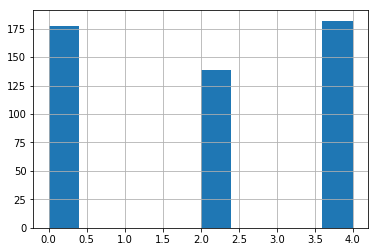

In [11]:
test.iloc[:, 0].hist()

In [12]:
# filtering out data points of class==`2` i.e. 'neutral'

neutral_test_data = test[test.iloc[:, 0] != 2]

In [13]:
X_test = neutral_test_data.iloc[:, 5].apply(preprocess_tweets)
y_test = neutral_test_data[[0]]

y_test[y_test==4] = 1

In [14]:
X_test = cv.transform(X_test)

In [15]:
nb = BernoulliNB()
nb.fit(X, y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [16]:
print("Accuracy: %s"%(accuracy_score(y_test, nb.predict(X_test))))

Accuracy: 0.841225626740947


In [17]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, nb.predict(X_test))
print(matrix)

[[144  33]
 [ 24 158]]


In [18]:
print("Precision: %s \nRecall:    %s"%(matrix[1][1]/(matrix[1][1]+matrix[1][0]), matrix[1][1]/(matrix[1][1]+matrix[0][1])))

Precision: 0.8681318681318682 
Recall:    0.8272251308900523
